# Inflation Forecasting Challenge: Guidance for Participants


This notebook is designed for the **RAMP challenge** on forecasting inflation using macroeconomic indicators from the **FRED dataset**. 

## **Objectives**
- Load and explore macroeconomic data.
- Perform **time-series visualization**.
- Train a **baseline model** for inflation prediction.
- Evaluate model performance using **RMSE, MAE**.

---

## **Understanding the Challenge**
### **Why is Inflation Forecasting Important?**
Inflation impacts **monetary policy, financial markets, and consumer behavior**. Accurate inflation forecasts help:
- **Policymakers (e.g., central banks)** adjust interest rates.
- **Investors** make informed decisions about asset allocation.
- **Businesses** manage pricing strategies and cost planning.

### **Key Challenges in This Dataset**
1. **Small Dataset**: The number of data points is relatively small compared to the number of variables.
2. **High Dimensionality**: Many macroeconomic indicators may be **irrelevant** or highly correlated.
3. **Time Dependence**: Inflation follows economic cycles, so **manual lagged features** are crucial.
4. **Feature Selection is Key**: Not all variables contribute to inflation; participants must identify the most **informative predictors**.



In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from problem import get_train_data
from estimator import get_estimator
    

In [19]:

# Load training data
X_df, y = get_train_data()

# Display first few rows
print("Training Data Sample:")
display(X_df.head())

# Check dataset statistics
print("Dataset Statistics:")
display(X_df.describe())


Training Data Sample:


,CPILFESL,UNRATE,GDPC1,FEDFUNDS,DGS1,DGS10,M2SL,DCOILWTICO,CSUSHPINSA,RSXFS,...,BUSINV,EXUSUK,EXUSEU,SP500,VIXCLS,GS10,PPIACO,HOUST,CPIAUCSL,T10YIE
DATE,,,,,,,,,,,,,,,,,,,,,
2015-02-28,240.172,5.5,18666.621,0.11,0.224211,1.975263,11880.4,50.584211,166.623,384779.0,...,1795461.0,1.5329,1.1350,2110.848000,15.904211,1.98,191.1,886.0,235.342,1.715263
2015-03-31,240.755,5.4,18666.621,0.11,0.253636,2.042727,11892.9,47.823636,168.082,390738.0,...,1798476.0,1.4958,1.0819,2079.990455,14.812727,2.04,191.5,960.0,235.976,1.761818
2015-04-30,241.346,5.4,18782.243,0.12,0.233636,1.935000,11932.5,54.452857,169.964,391246.0,...,1804475.0,1.4968,1.0822,2094.862857,13.494762,1.94,190.9,1190.0,236.222,1.858182
2015-05-31,241.688,5.6,18782.243,0.12,0.241000,2.197500,11963.8,59.265000,171.846,394260.0,...,1809028.0,1.5456,1.1167,2111.943500,13.338500,2.20,193.4,1079.0,237.001,1.865500
2015-06-30,242.064,5.3,18782.243,0.13,0.275455,2.363636,12011.1,59.819545,173.447,394652.0,...,1820330.0,1.5576,1.1226,2099.283636,14.339545,2.36,194.8,1205.0,237.657,1.865909


Dataset Statistics:


,CPILFESL,UNRATE,GDPC1,FEDFUNDS,DGS1,DGS10,M2SL,DCOILWTICO,CSUSHPINSA,RSXFS,...,BUSINV,EXUSUK,EXUSEU,SP500,VIXCLS,GS10,PPIACO,HOUST,CPIAUCSL,T10YIE
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,252.773627,4.393220,19709.982051,1.120678,1.323183,2.279273,13524.050847,53.024137,191.685136,421350.966102,...,1.907990e+06,1.354473,1.128953,2459.462465,15.095326,2.278983,194.266102,1207.406780,245.962983,1.791862
std,7.425738,0.603685,708.626045,0.819667,0.823819,0.430582,979.857664,9.349994,13.900293,21672.718170,...,8.379224e+04,0.102090,0.042360,356.830728,3.682245,0.430167,6.574811,101.401068,7.000279,0.216503
min,240.172000,3.500000,18666.621000,0.110000,0.224211,1.504000,11880.400000,30.323000,166.623000,384779.000000,...,1.795461e+06,1.216000,1.054500,1904.418500,10.125455,1.500000,181.300000,886.000000,235.342000,1.307500
25%,246.844000,3.800000,19062.709000,0.375000,0.561988,1.955132,12739.800000,46.671454,179.414500,398790.500000,...,1.832266e+06,1.286650,1.105050,2105.065818,12.535228,1.960000,188.650000,1152.500000,239.274500,1.602857
50%,251.985000,4.300000,19660.766000,1.150000,1.223500,2.263158,13628.900000,51.970476,193.498000,416613.000000,...,1.885696e+06,1.314000,1.122800,2454.102500,14.339545,2.260000,193.900000,1205.000000,244.243000,1.820909
75%,258.642500,4.900000,20290.514000,1.870000,2.028929,2.551667,14243.150000,58.708214,204.810000,439344.000000,...,1.982840e+06,1.426950,1.150900,2770.164497,16.755682,2.550000,199.300000,1271.500000,252.371500,1.936190
max,266.020000,5.600000,20985.448000,2.420000,2.698500,3.152273,15334.300000,70.981429,212.226000,457253.000000,...,2.046856e+06,1.557800,1.234000,3176.749524,24.953158,3.150000,204.600000,1548.000000,258.630000,2.141818


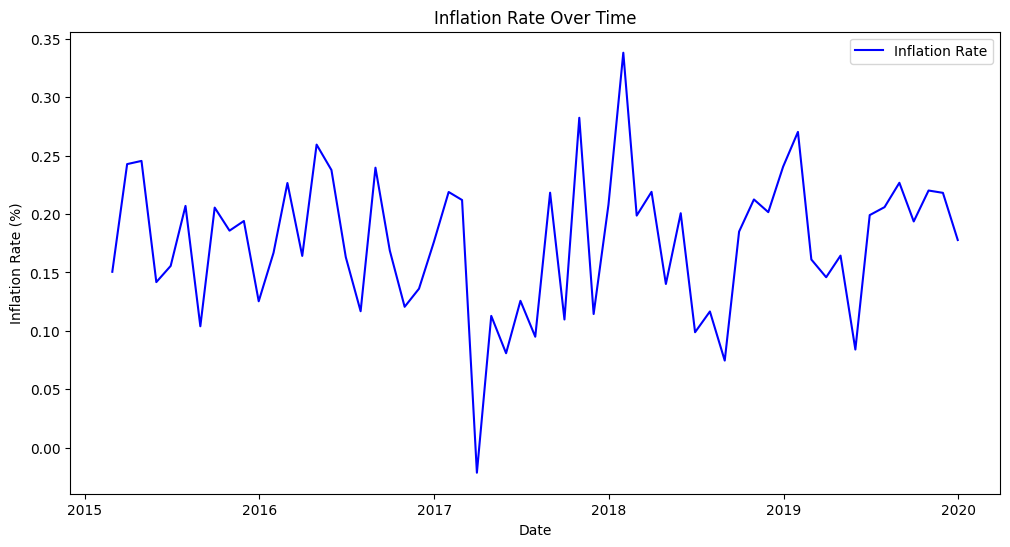

In [20]:

# Time-Series Plot of Inflation Rate
plt.figure(figsize=(12, 6))
plt.plot(X_df.index, y, label='Inflation Rate', color='blue')
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation Rate Over Time")
plt.legend()
plt.show()
    

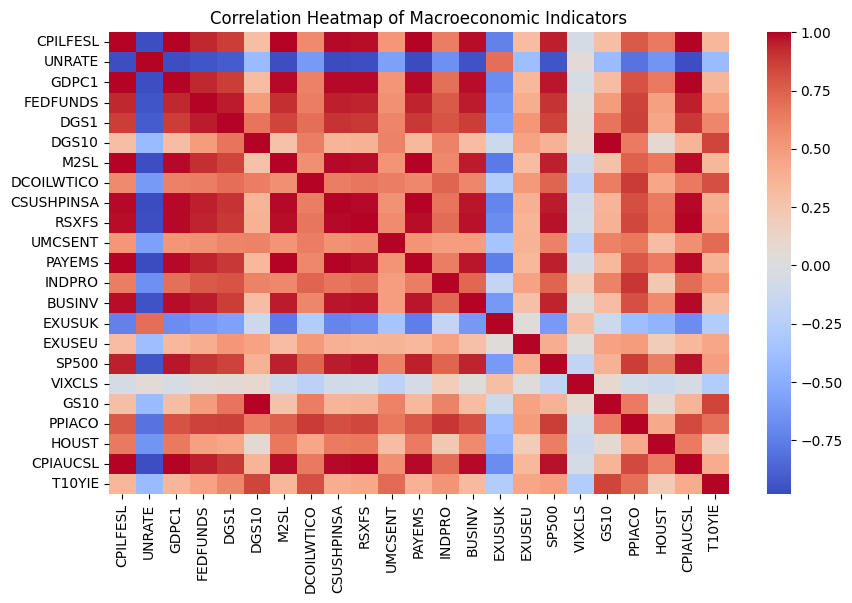

In [21]:

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(X_df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()
    

In [22]:

# Train a baseline model
print("Training Baseline Model...")
model = get_estimator()
model.fit(X_df, y)

# Make Predictions
y_pred = model.predict(X_df)
    

Training Baseline Model...


MAE: 0.0197, RMSE: 0.0242


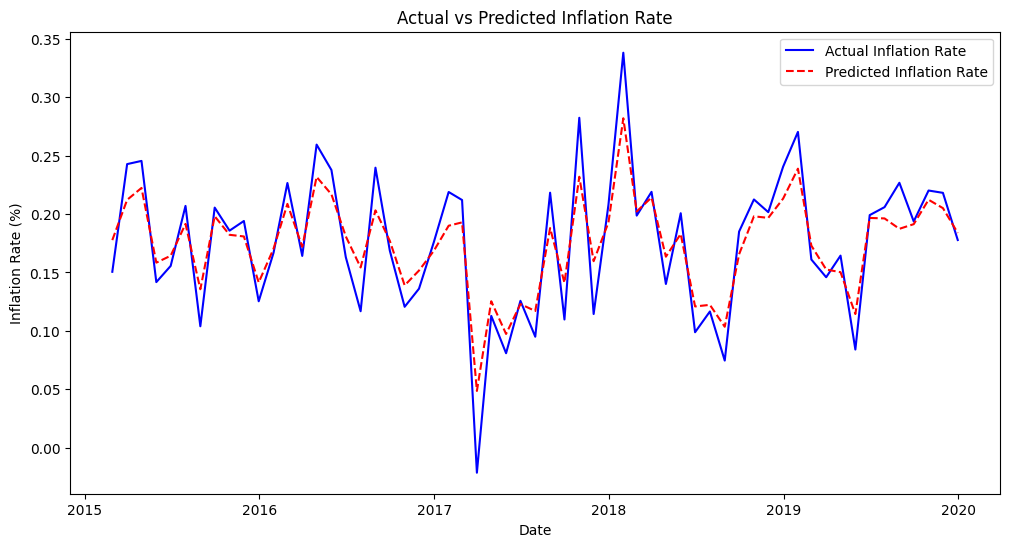

In [23]:

# Evaluate model performance
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(X_df.index, y, label='Actual Inflation Rate', color='blue')
plt.plot(X_df.index, y_pred, label='Predicted Inflation Rate', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("Actual vs Predicted Inflation Rate")
plt.legend()
plt.show()
    


## **Next Steps**
- Try different models like **ARIMA**, **Random Forest**, or **LSTM**.
- Perform feature engineering to improve prediction accuracy.
- Tune hyperparameters for optimal performance.

🚀 **Good luck with your Inflation Forecasting Challenge!**  
    